In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics.pairwise import cosine_similarity

import os
import zipfile
import cv2
import shutil
import random
from PIL import Image


import warnings
warnings.filterwarnings("ignore")

import sys
print("Python Version: ", sys.version)
print("Tensorflow Version: ", tf.__version__)

# DEFINED
BATCH_SIZE = 32
IMG_WIDTH  = 227
IMG_HEIGHT = 227

Python Version:  3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Tensorflow Version:  2.16.1


In [2]:
# Load model
model = keras.models.load_model("../TrainingModels/AlexNet.keras")

In [3]:
furniture_df = pd.read_csv("../furniture_data.csv")
shuffled_furniture_df = furniture_df.sample(frac=1).reset_index(drop=True)

shutil.copy(shuffled_furniture_df['Image_Path'].iloc[0], "../ImageTesting/Task 3")

'../ImageTesting/Task 3\\11204modern-nightstands-and-bedside-tables.jpg'

In [4]:
shuffled_furniture_df

,Furniture_Category,Furniture_Type,Image_Path
0,dressers,Modern,../Furniture_Data\dressers\Modern\11204modern-...
1,tables,Modern,../Furniture_Data\tables\Modern\10039modern-si...
2,lamps,Contemporary,../Furniture_Data\lamps\Contemporary\617contem...
3,chairs,Tropical,../Furniture_Data\chairs\Tropical\26612tropica...
4,sofas,Midcentury,../Furniture_Data\sofas\Midcentury\2300midcent...
...,...,...,...
90079,lamps,Beach,../Furniture_Data\lamps\Beach\24220beach-style...
90080,chairs,Transitional,../Furniture_Data\chairs\Transitional\22800tra...
90081,tables,Modern,../Furniture_Data\tables\Modern\10893modern-co...
90082,chairs,Midcentury,../Furniture_Data\chairs\Midcentury\17934midce...


In [5]:
furniture_df['Furniture_Category_Type'] = furniture_df['Furniture_Category'] + '-' + furniture_df['Furniture_Type']

furniture_df

,Furniture_Category,Furniture_Type,Image_Path,Furniture_Category_Type
0,beds,Asian,../Furniture_Data\beds\Asian\19726asian-daybed...,beds-Asian
1,beds,Asian,../Furniture_Data\beds\Asian\20027asian-canopy...,beds-Asian
2,beds,Asian,../Furniture_Data\beds\Asian\20109asian-panel-...,beds-Asian
3,beds,Asian,../Furniture_Data\beds\Asian\20508asian-platfo...,beds-Asian
4,beds,Asian,../Furniture_Data\beds\Asian\20750asian-comfor...,beds-Asian
...,...,...,...,...
90079,tables,Victorian,../Furniture_Data\tables\Victorian\5victorian-...,tables-Victorian
90080,tables,Victorian,../Furniture_Data\tables\Victorian\6victorian-...,tables-Victorian
90081,tables,Victorian,../Furniture_Data\tables\Victorian\7victorian-...,tables-Victorian
90082,tables,Victorian,../Furniture_Data\tables\Victorian\8victorian-...,tables-Victorian


C:\Users\CYBER\Desktop\Furniture-Classification-Model-main\ImageTesting\Task 3\6989modern-armchairs-and-accent-chairs.jpg is a .jpg file


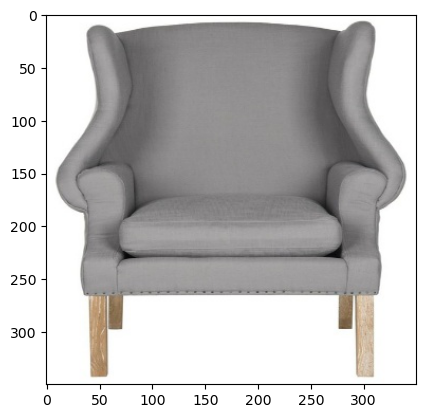

In [6]:
input_image_path = input("Please Input Your Image Location: ")
input_image_path.replace('\\', '/')

# Get the file extension from the file path
file_ext = os.path.splitext(input_image_path)[1]

# Check if the file extension is ".jpg"
if file_ext.lower() == ".jpg":
    correct_image_path = input_image_path
    plt.imshow(Image.open(input_image_path))
    print(f"{input_image_path} is a .jpg file")
else:
    print(f"{input_image_path} is not a .jpg file")

In [7]:
def prepare_image(filepath):
    """Prepares an image for the model."""
    img_array = cv2.cvtColor(cv2.imread(filepath), cv2.COLOR_BGR2RGB)
    new_array = cv2.resize(img_array, (IMG_WIDTH, IMG_HEIGHT))
    return np.expand_dims(new_array, axis=0) # No need to repeat for prediction

# Predict furniture image
prediction = model.predict(prepare_image(correct_image_path)) 
predicted_class = furniture_df["Furniture_Category_Type"].unique()[np.argmax(prediction)]

# Get type of furniture data directly based on predicted class
types_predict_dataset = furniture_df[furniture_df['Furniture_Category_Type'] == predicted_class]['Image_Path']
# Reset index if needed 
types_predict_dataset.reset_index(inplace=True, drop=True)

types_predict_dataset

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


0       ../Furniture_Data\chairs\Midcentury\1408midcen...
1       ../Furniture_Data\chairs\Midcentury\14214midce...
2       ../Furniture_Data\chairs\Midcentury\14263midce...
3       ../Furniture_Data\chairs\Midcentury\14310midce...
4       ../Furniture_Data\chairs\Midcentury\14369midce...
                              ...                        
3580    ../Furniture_Data\chairs\Midcentury\9419midcen...
3581    ../Furniture_Data\chairs\Midcentury\9421midcen...
3582    ../Furniture_Data\chairs\Midcentury\9437midcen...
3583    ../Furniture_Data\chairs\Midcentury\9439midcen...
3584    ../Furniture_Data\chairs\Midcentury\9441midcen...
Name: Image_Path, Length: 3585, dtype: object

In [8]:
# Load and process input image
input_image = Image.open(correct_image_path).convert('RGB')
input_image = input_image.resize((IMG_WIDTH, IMG_HEIGHT))
input_vector = np.array(input_image).ravel().reshape(1, -1)

# Load and process dataset images using list comprehension
dataset_vectors = np.array([
    np.array(Image.open(path).convert('RGB').resize((IMG_WIDTH, IMG_HEIGHT))).ravel() 
    for path in types_predict_dataset
])

In [9]:
dataset_vectors

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [10]:
input_vector

array([[255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [11]:
# Define batch size
batch_size = 1000

# Calculate similarity scores in batches
similarity_scores = np.empty((len(input_vector), len(dataset_vectors))) # Pre-allocate memory
for i in range(0, len(dataset_vectors), batch_size):
    similarity_scores[:, i:i+batch_size] = cosine_similarity(
        input_vector, dataset_vectors[i:i+batch_size]
    )

In [12]:
flattened_similarity_scores = similarity_scores.flatten()

flattened_similarity_scores

array([0.92644142, 0.95280538, 0.92295125, ..., 0.88858295, 0.91992005,
       0.94748207])

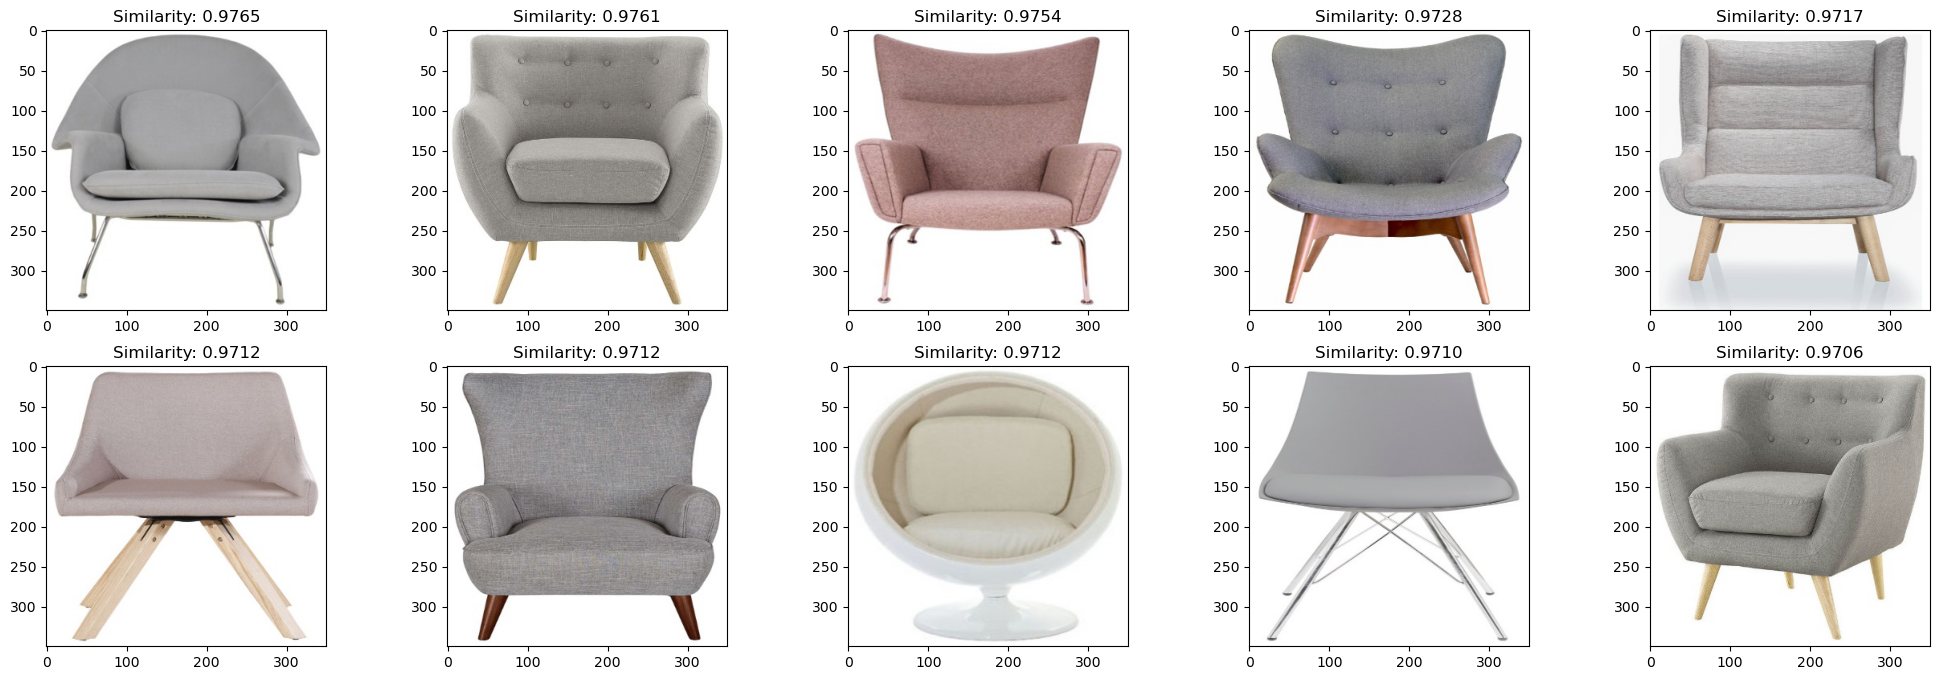

In [13]:
# Get the top 10 most similar image indices directly
top_indices = np.argsort(similarity_scores.ravel())[-10:][::-1]  # Get top 10 in descending order

# Get paths of the top 10 most similar images
top_paths = types_predict_dataset.iloc[top_indices]

# Display the top 10 most similar images and their scores
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 8))
for i, ax in enumerate(axes.flat):
    image_path = top_paths.iloc[i]  
    similarity_score = similarity_scores.ravel()[top_indices[i]]

    ax.imshow(Image.open(image_path))
    ax.set_title(f"Similarity: {similarity_score:.4f}")
plt.show()